# 演習 Exercise 10_1

### 1. パッケージをインポートする Import packages
numpyを`np`という名前でインポート　　import the numpy pacakge under the name `np` 

matplotlib.pyplotを`plt`という名前でインポート　　import the matplotlib's pyplot package under the name `plt` 

In [3]:
# 数値計算に使うライブラリ
import numpy as np

# グラフ描画に使うライブラリ
import matplotlib.pyplot as plt

### 2. ３個のサイコロの目の和の確率変数と確率分布を求める　Calculation of a probability distribution of the sum of pips of three dices
####  確率変数をサイコロの目の和とする  We regard the sum of pips of the dices as a R.V.
辞書型のオブジェクトに確率分布を定義：キーを確率変数、対応する値を確率とする

３個のサイコロの目の和のすべての組み合わせを列挙し，確率を求める．

In [51]:
list_ = [i+j+k for i in range(1,7) for j in range(1,7) for k in range(1,7)]  
dist = {}
for x in list_:
    dist[x] = dist.get(x,0)+1

for i in dist.keys():
    dist[i] = dist[i]/(6**3)
dist.items()

dict_items([(3, 0.004629629629629629), (4, 0.013888888888888888), (5, 0.027777777777777776), (6, 0.046296296296296294), (7, 0.06944444444444445), (8, 0.09722222222222222), (9, 0.11574074074074074), (10, 0.125), (11, 0.125), (12, 0.11574074074074074), (13, 0.09722222222222222), (14, 0.06944444444444445), (15, 0.046296296296296294), (16, 0.027777777777777776), (17, 0.013888888888888888), (18, 0.004629629629629629)])

### 3. 棒グラフを使って確率分布を図示 plot the probability distribution by using a bar graph

以下のようなグラフになります。

<!-- dom:FIGURE: [Figs/axis.png, width=200] -->
<!-- begin figure -->

<p></p>
<img src="fig1.png" width=400>

<!-- end figure -->

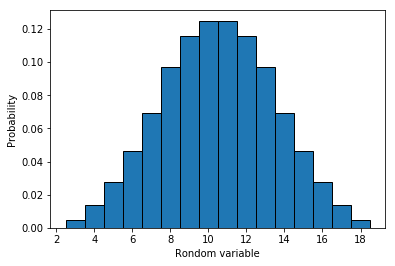

In [49]:
x = list(dist.keys())
y = list(dist.values())

#plt.bar(list(dist.keys()), list(dist.values()), width=1, ec='black' )
plt.bar(x, y, width=1, ec='black' )
plt.xlabel("Rondom variable")
plt.ylabel("Probability")
plt.show()

### 4. 累積分布関数を定義 Definition of a function of the CDF
$F(x)=\sum_{X\leq x} P(X)$

In [6]:
def Cdf(dist, x):
    prob = 0.0
    for value in dist.keys():
        if value <= x:
            prob += dist[value]
    return prob

### 5. 累積分布関数を求める Calculation of the CDF

In [7]:
cdf_dis ={}
for x in range(0,19):
    cdf = Cdf(dist, x)
    cdf_dis[x] = cdf

### 6. 累積分布関数を図示 Plot the CDF by using a bar graph
以下のようなグラフになります。

<!-- dom:FIGURE: [Figs/axis.png, width=200] -->
<!-- begin figure -->

<p></p>
<img src="fig2.png" width=400>

<!-- end figure -->

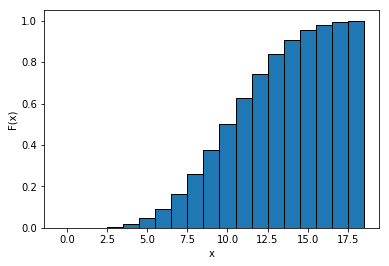

In [8]:
plt.bar(cdf_dis.keys(), cdf_dis.values(), width=1, ec='black' )
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

### 7. 期待値を求める関数を定義 Definition of a function of expected value
$E[X]=\sum_i x_i p_i$ 

In [54]:
def Expect(dist):
    e = sum([x*p for x,p in dist.items()])
    return e

### 7. 分散を求める関数を定義 Definition of a function of variance
$V[X]=\sum_{i} (x_i-E[X])^2 p_i$

In [26]:
def Variance(dist):
    e = Expect(dist)
    var = sum([((x - e)**2)*p for x,p in dist.items()])
    return var

### 8. 標準偏差を求める関数を定義 Definition of a function of standard deviation
$D[X]=\sqrt{V[X]}$

xの平方根を求めるときにはnp.sqrt(x) 

np.sqrt(x): return the positive square-root of x

In [39]:
def Std(dist):
    std = np.sqrt(Variance(dist))
    return std

### 9. 期待値、分散、標準偏差を求める Calculation of the expected value, variance and standard deviation

結果は以下のように (The results are shown as below)

期待値(Expectation):10.500  
分散(Variance):8.750  
標準偏差(Standard deviation):2.958  

In [55]:
print("期待値(Expectation):{:.3f}".format(Expect(dist)))
print("分散(Variance):{:.3f}".format(Variance(dist)))
print("標準偏差(Standard deviation):{:.3f}".format(Std(dist)))

期待値(Expectation):10.500
分散(Variance):8.750
標準偏差(Standard deviation):2.958


### 10. 標準化変数を求める関数を定義 Definition of a function of z-score normalization

In [43]:
def Zscore(dist):
    z = [(x - Expect(dist)) / Std(dist) for x in dist.keys()]
    normalized_dist = dict(zip(z, dist.values()))
    return normalized_dist

### 11. 標準化変数を求め、標準化後の期待値、分散、標準偏差を求める Calculation of the expected value, variance and standard deviation of the normalized probability distribution

結果は以下のように (The results are shown as below)  

期待値(Expectation):-0.000  
分散(Variance):1.000  
標準偏差(Standard deviation):1.000    

In [46]:
z = Zscore(dist)
print("期待値(Expectation):{:.3f}".format(Expect(z)))
print("分散(Variance):{:.3f}".format(Variance(z)))
print("標準偏差(Standard deviation):{:.3f}".format(Std(z)))
z

期待値(Expectation):-0.000
分散(Variance):1.000
標準偏差(Standard deviation):1.000


{-2.5354627641855507: 0.004629629629629629,
 -2.1974010622941438: 0.013888888888888888,
 -1.8593393604027373: 0.027777777777777776,
 -1.5212776585113306: 0.046296296296296294,
 -1.1832159566199241: 0.06944444444444445,
 -0.84515425472851724: 0.09722222222222222,
 -0.50709255283711063: 0.11574074074074074,
 -0.16903085094570394: 0.125,
 0.16903085094570275: 0.125,
 0.50709255283710941: 0.11574074074074074,
 0.84515425472851613: 0.09722222222222222,
 1.1832159566199227: 0.06944444444444445,
 1.5212776585113295: 0.046296296296296294,
 1.8593393604027362: 0.027777777777777776,
 2.1974010622941429: 0.013888888888888888,
 2.5354627641855494: 0.004629629629629629}


### 12. 標準化後の確率分布を図示 Plotting the  normalized probability distribution

以下のようなグラフになります。

<!-- dom:FIGURE: [Figs/axis.png, width=200] -->
<!-- begin figure -->

<p></p>
<img src="fig3.png" width=400>

<!-- end figure -->

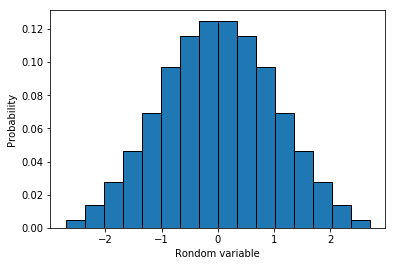

In [47]:
plt.bar(z.keys(), z.values(), width=0.34,ec='black' )
plt.xlabel("Rondom variable")
plt.ylabel("Probability")
plt.show()